In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.metrics import confusion_matrix as cm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

starbucks = pd.read_csv("D:/UTC/SY09/Projet/tests locaux/clean_starbucks.csv")
starbucksX = starbucks.drop(columns=["product_name", "milk", "size", "whip", "serv_size_m_l", "Category"])
#starbucksX = starbucks.drop(columns=["product_name", "size", "Category"])
starbucksZ = starbucks.Category

<Axes: xlabel='Model', ylabel='Accuracy'>

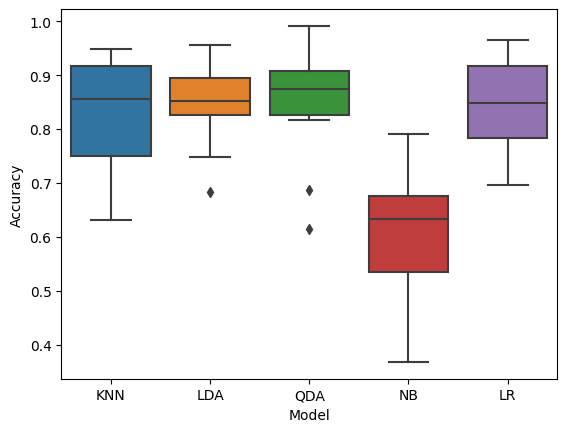

In [3]:
# Comparaison des modèles par validation croisée

plis = 10

models = [
    (KNeighborsClassifier(n_neighbors=1), "KNN"),
    (LinearDiscriminantAnalysis(), "LDA"),
    (QuadraticDiscriminantAnalysis(), "QDA"),
    (GaussianNB(), "NB"),
    (LogisticRegression(max_iter=5000), "LR"),
    #(DecisionTreeClassifier(), "DT"),
]

def validation_errors(X, Z, models):
    for model, name in models:
        for acc in cross_val_score(model, X, Z, cv=10):
            yield name, acc
            
cv_err_X1 = pd.DataFrame(validation_errors(starbucksX, starbucksZ, models), columns=["Model", "Accuracy"])
sns.boxplot(x="Model", y="Accuracy", data=cv_err_X1)

Index(['calories', 'total_fat_g', 'saturated_fat_g', 'trans_fat_g',
       'cholesterol_mg', 'sodium_mg', 'total_carbs_g', 'fiber_g', 'sugar_g',
       'caffeine_mg'],
      dtype='object')


<Axes: xlabel='Model', ylabel='Accuracy'>

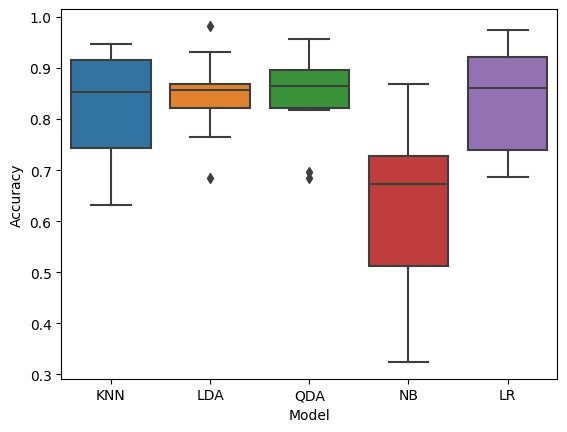

In [4]:
# On essaye d'enlever des colonnes peu importantes dans l'ACP

print(starbucksX.columns)
starbucksX2 = starbucksX.drop(columns=['total_fat_g', 'saturated_fat_g', 'trans_fat_g', 'fiber_g'])
starbucksZ2 = starbucksZ.copy()

cv_err_X2 = pd.DataFrame(validation_errors(starbucksX2, starbucksZ2, models), columns=["Model", "Accuracy"])
sns.boxplot(x="Model", y="Accuracy", data=cv_err_X2)

In [5]:
# Génération de modèles

LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
LR = LogisticRegression(max_iter=5000)

X_train, X_test, z_train, z_test = train_test_split(starbucksX, starbucksZ, test_size=0.33, random_state=23)

LDA.fit(X_train, z_train)
QDA.fit(X_train, z_train)
LR.fit(X_train, z_train)

z_pred_lda = LDA.predict(X_test)
z_pred_qda = QDA.predict(X_test)
z_pred_lr = LR.predict(X_test)

print("LDA : ", accuracy_score(z_pred_lda, z_test))
print("QDA : ", accuracy_score(z_pred_qda, z_test))
print("LR : ", accuracy_score(z_pred_lr, z_test))

LDA :  0.899736147757256
QDA :  0.8759894459102903
LR :  0.8970976253298153


In [6]:
# Transformations binaires

z_coffee = starbucksZ.replace("coffee", 1)
z_coffee = z_coffee.replace("tea", 0)
z_coffee = z_coffee.replace("frappuccino", 0)
z_coffee = z_coffee.replace("other", 0)
z_coffee = z_coffee.replace("chocolate", 0)

z_tea = starbucksZ.replace("tea", 1)
z_tea = z_tea.replace("coffee", 0)
z_tea = z_tea.replace("frappuccino", 0)
z_tea = z_tea.replace("other", 0)
z_tea = z_tea.replace("chocolate", 0)

z_frappuccino = starbucksZ.replace("frappuccino", 1)
z_frappuccino = z_frappuccino.replace("coffee", 0)
z_frappuccino = z_frappuccino.replace("tea", 0)
z_frappuccino = z_frappuccino.replace("other", 0)
z_frappuccino = z_frappuccino.replace("chocolate", 0)

z_chocolate = starbucksZ.replace("chocolate", 1)
z_chocolate = z_chocolate.replace("coffee", 0)
z_chocolate = z_chocolate.replace("tea", 0)
z_chocolate = z_chocolate.replace("other", 0)
z_chocolate = z_chocolate.replace("frappuccino", 0)


--------------- Coffee
Ensemble de test :  379  avec  177   Coffee
LDA :  0.9155672823218998
QDA :  0.9102902374670184
LR :  0.9287598944591029


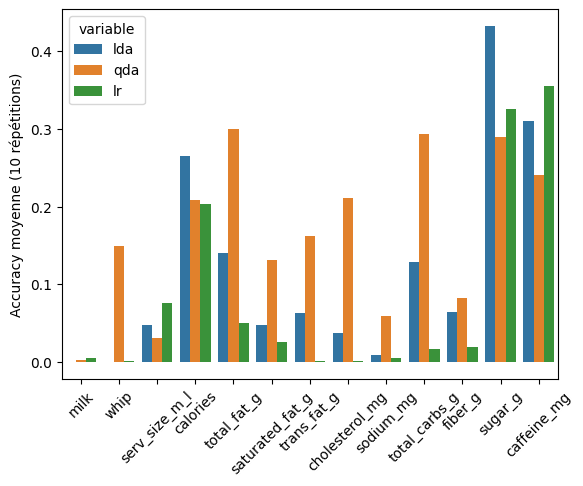

--------------- Tea


C:\Users\leond\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Ensemble de test :  379  avec  66   Tea
LDA :  0.8786279683377308
QDA :  0.8047493403693932
LR :  0.9102902374670184


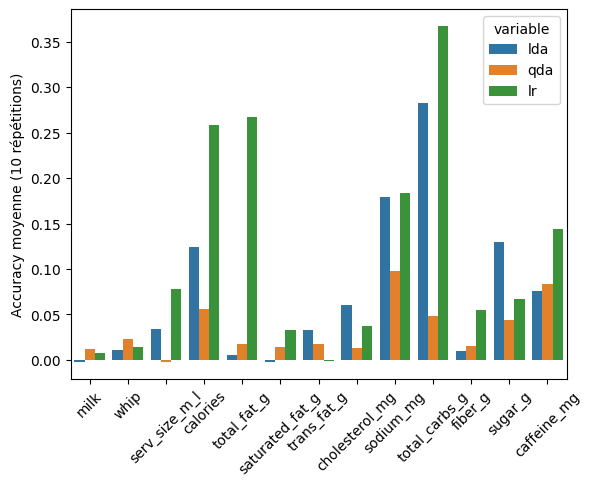

--------------- Frappuccino
Ensemble de test :  379  avec  105   Frappuccino
LDA :  0.9604221635883905
QDA :  0.9656992084432717
LR :  0.9472295514511874


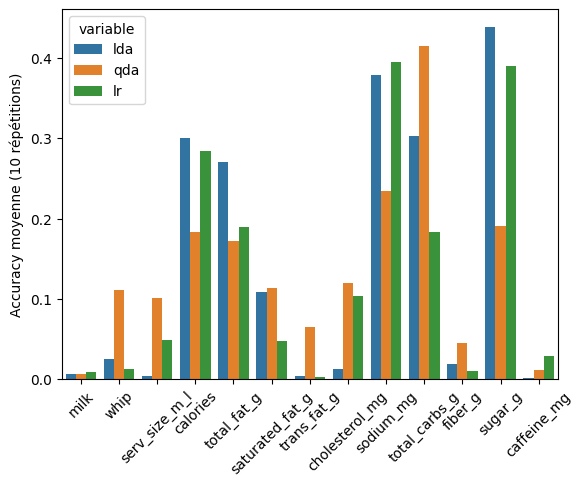

--------------- Chocolate
Ensemble de test :  379  avec  22   Chocolate
LDA :  0.9762532981530343
QDA :  1.0
LR :  0.9973614775725593


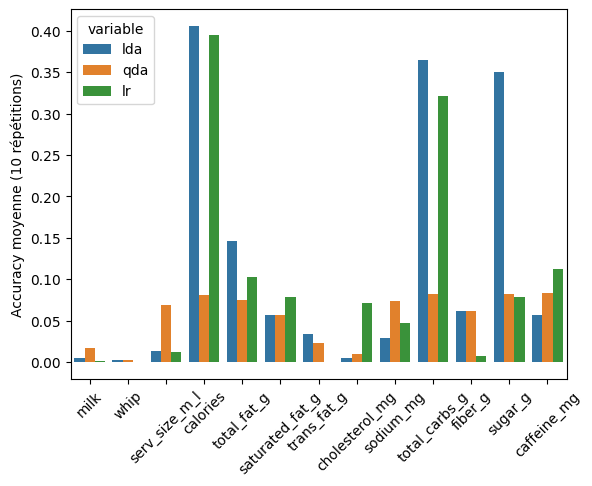

In [7]:
# Comparaison des feature importance par test de permutation

from sklearn.inspection import permutation_importance

starbucksX = starbucks.drop(columns=["product_name", "size", "Category"])

Z = [(z_coffee, "Coffee"), (z_tea, "Tea"), (z_frappuccino, "Frappuccino"), (z_chocolate, "Chocolate")]

for z in Z :
    print("---------------", z[1])
    
    X_train, X_test, z_train, z_test = train_test_split(starbucksX, z[0], test_size=0.33, random_state=23)
    colnames = starbucksX.columns
    
    LDA.fit(X_train, z_train)
    QDA.fit(X_train, z_train)
    LR.fit(X_train, z_train)

    z_pred_lda = LDA.predict(X_test)
    z_pred_qda = QDA.predict(X_test)
    z_pred_lr = LR.predict(X_test)

    print("Ensemble de test : ", len(z_test), " avec ", sum(z_test), " ", z[1])
    print("LDA : ", accuracy_score(z_pred_lda, z_test))
    print("QDA : ", accuracy_score(z_pred_qda, z_test))
    print("LR : ", accuracy_score(z_pred_lr, z_test))
    
    perm_importance_result_train_lda = permutation_importance(
        LDA, X_train, z_train, n_repeats=10
    )
    
    lda_mean = perm_importance_result_train_lda["importances_mean"]
    lda_std = perm_importance_result_train_lda["importances_std"]
    
    perm_importance_result_train_qda = permutation_importance(
        QDA, X_train, z_train, n_repeats=10
    )
    
    qda_mean = perm_importance_result_train_qda["importances_mean"]
    qda_std = perm_importance_result_train_qda["importances_std"]
    
    perm_importance_result_train_lr = permutation_importance(
        LR, X_train, z_train, n_repeats=10
    )
    
    lr_mean = perm_importance_result_train_lr["importances_mean"]
    lr_std = perm_importance_result_train_lr["importances_std"]
    
    feature_importance_mean = {
        "feature" : colnames,
        "lda" : lda_mean,
        "qda" : qda_mean,
        "lr" : lr_mean
    }
    
    feature_importance_mean = pd.DataFrame(feature_importance_mean).melt("feature")
    feature_importance_mean = feature_importance_mean.rename(columns={"value": "mean"})
    '''
    feature_importance_std = {
        "feature" : colnames,
        "lda" : lda_std,
        "qda" : qda_std,
        "lr" : lr_std
    }
    
    feature_importance_std = pd.DataFrame(feature_importance_std).melt("feature")
    feature_importance_std = feature_importance_std.rename(columns={"value": "std"})
    
    feature_importance = pd.concat([feature_importance_mean, feature_importance_std["std"]], axis = 1)
    '''
    feature_importance = feature_importance_mean
    #print(feature_importance)
    
    bp = sns.barplot(
        x="feature",
        y="mean",
        hue="variable",
        data=feature_importance
    )
    bp.set(xlabel="", ylabel="Accuracy moyenne (10 répétitions)")
    plt.xticks(rotation=45)
    plt.show()

In [8]:
print(starbucksX.columns)

Index(['milk', 'whip', 'serv_size_m_l', 'calories', 'total_fat_g',
       'saturated_fat_g', 'trans_fat_g', 'cholesterol_mg', 'sodium_mg',
       'total_carbs_g', 'fiber_g', 'sugar_g', 'caffeine_mg'],
      dtype='object')


LDA :  0.9050131926121372
QDA :  0.6649076517150396
LR :  0.9182058047493403


C:\Users\leond\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\leond\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDA :  0.9076517150395779
QDA :  0.6675461741424802
LR :  0.920844327176781


<Axes: ylabel='Feature'>

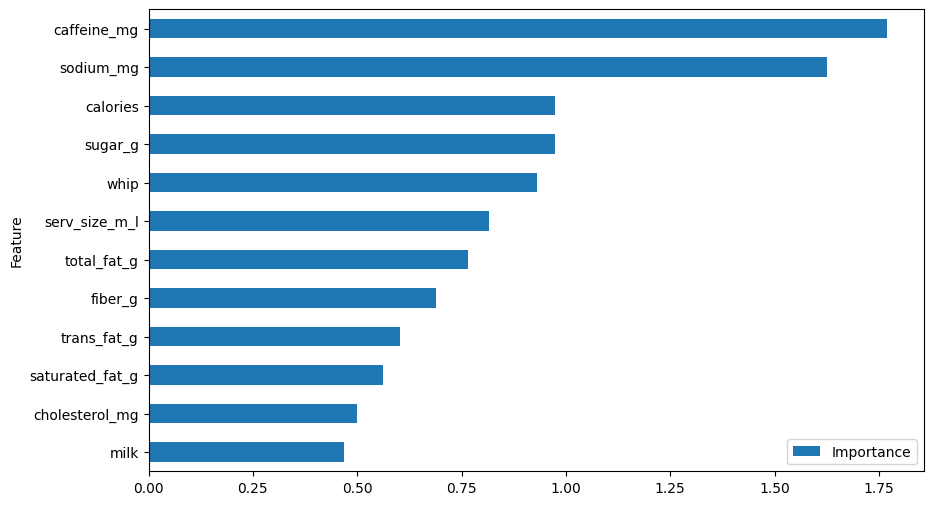

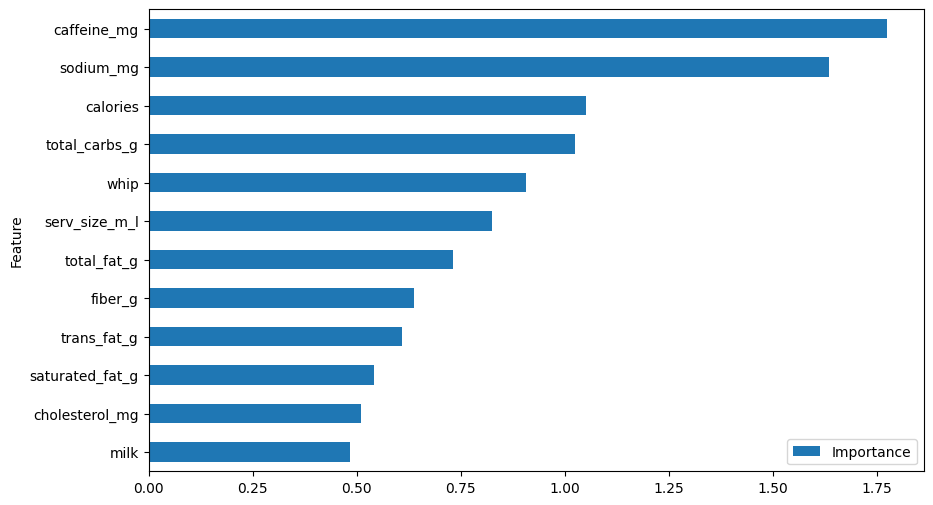

In [9]:
# Essais glucides-sucres

from sklearn.preprocessing import StandardScaler



starbucksX2 = starbucksX.drop(columns=["sugar_g"])
colnames2 = starbucksX2.columns
scaler = StandardScaler()
scaler.fit(starbucksX2)
starbucksX2 = scaler.transform(starbucksX2)

starbucksX3 = starbucksX.drop(columns=["total_carbs_g"])
colnames3 = starbucksX3.columns
scaler = StandardScaler()
scaler.fit(starbucksX3)
starbucksX3 = scaler.transform(starbucksX3)

LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
LR = LogisticRegression(max_iter=5000)

X_train, X_test, z_train, z_test = train_test_split(starbucksX3, starbucksZ, test_size=0.33, random_state=23)

LDA.fit(X_train, z_train)
QDA.fit(X_train, z_train)
LR.fit(X_train, z_train)

z_pred_lda = LDA.predict(X_test)
z_pred_qda = QDA.predict(X_test)
z_pred_lr = LR.predict(X_test)

print("LDA : ", accuracy_score(z_pred_lda, z_test))
print("QDA : ", accuracy_score(z_pred_qda, z_test))
print("LR : ", accuracy_score(z_pred_lr, z_test))

coefficients = LR.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': colnames3, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


X_train, X_test, z_train, z_test = train_test_split(starbucksX2, starbucksZ, test_size=0.33, random_state=23)

LDA.fit(X_train, z_train)
QDA.fit(X_train, z_train)
LR.fit(X_train, z_train)

z_pred_lda = LDA.predict(X_test)
z_pred_qda = QDA.predict(X_test)
z_pred_lr = LR.predict(X_test)

print("LDA : ", accuracy_score(z_pred_lda, z_test))
print("QDA : ", accuracy_score(z_pred_qda, z_test))
print("LR : ", accuracy_score(z_pred_lr, z_test))

coefficients = LR.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': colnames2, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [10]:
# On enlève les sucres

starbucksX4 = starbucksX.drop(columns=["sugar_g", "total_carbs_g"])
colnames2 = starbucksX4.columns
scaler = StandardScaler()
scaler.fit(starbucksX4)
starbucksX4 = scaler.transform(starbucksX4)

LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
LR = LogisticRegression(max_iter=5000)

X_train, X_test, z_train, z_test = train_test_split(starbucksX4, starbucksZ, test_size=0.33, random_state=23)

LDA.fit(X_train, z_train)
QDA.fit(X_train, z_train)
LR.fit(X_train, z_train)

z_pred_lda = LDA.predict(X_test)
z_pred_qda = QDA.predict(X_test)
z_pred_lr = LR.predict(X_test)

print("LDA : ", accuracy_score(z_pred_lda, z_test))
print("QDA : ", accuracy_score(z_pred_qda, z_test))
print("LR : ", accuracy_score(z_pred_lr, z_test))

LDA :  0.8759894459102903
QDA :  0.5804749340369393
LR :  0.9129287598944591


C:\Users\leond\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


count    1147.000000
mean       -2.721883
std         3.122888
min       -20.000000
25%        -3.000000
50%        -2.000000
75%        -1.000000
max        17.000000
dtype: float64


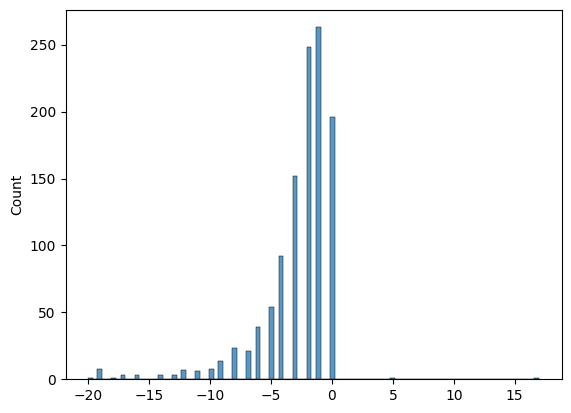

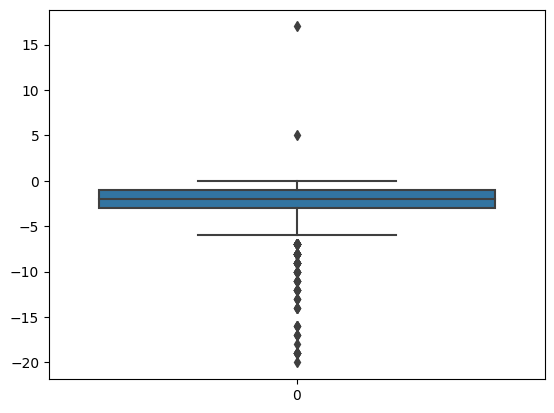

In [11]:
# Faire glucides - sucres

diff_gs = starbucks["sugar_g"] - starbucks["total_carbs_g"]

print(diff_gs.describe())

sns.histplot(diff_gs)
plt.show()

sns.boxplot(diff_gs)
plt.show()

In [12]:
# Feature importance en cross-validation

from sklearn.model_selection import cross_validate

LR = LogisticRegression(max_iter=10000)

starbucksX = starbucks.drop(columns=["product_name", "size", "Category"])
starbucksZ = starbucks.Category

# Mettre CV à 10
CV = cross_validate(LR, starbucksX, starbucksZ, cv = 10, return_estimator=True)

print(CV)

{'fit_time': array([4.39850974, 3.83735299, 5.03027797, 3.28266668, 3.84704947,
       4.48791003, 3.72897243, 4.2319355 , 4.1217401 , 7.44670916]), 'score_time': array([0.00500226, 0.00399542, 0.00501323, 0.00499725, 0.00400662,
       0.00400233, 0.00448632, 0.00499797, 0.00513649, 0.00401425]), 'estimator': [LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000)], 'test_score': array([0.87826087, 0.8173913 , 0.83478261, 0.71304348, 0.84347826,
       0.96521739, 0.97391304, 0.99122807, 0.77192982, 0.70175439])}


C:\Users\leond\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
colnames = CV['estimator'][0].feature_names_in_
catnames = CV['estimator'][0].classes_

res_average = []
res_std = []
for cat in range(0,len(catnames)):
    res_average_cat = []
    res_std_cat = []
    
    for col in range(0,len(colnames)):
        coefficients = []
        for est in range(0,len(CV['estimator'])):
            coefficients.append(CV['estimator'][est].coef_[cat][col])
        res_average_cat.append(np.exp(pd.Series(coefficients)).mean())
        res_std_cat.append(np.exp(pd.Series(coefficients)).std())
    
    res_average.append(res_average_cat)
    res_std.append(res_std_cat)

fi_average = pd.DataFrame(res_average)
fi_std = pd.DataFrame(res_std)

chocolate


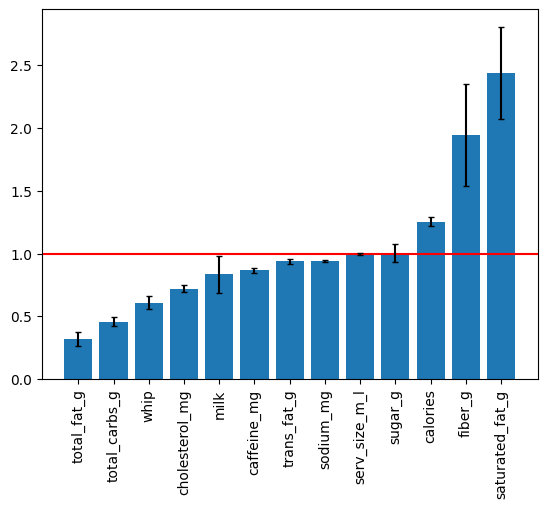

coffee


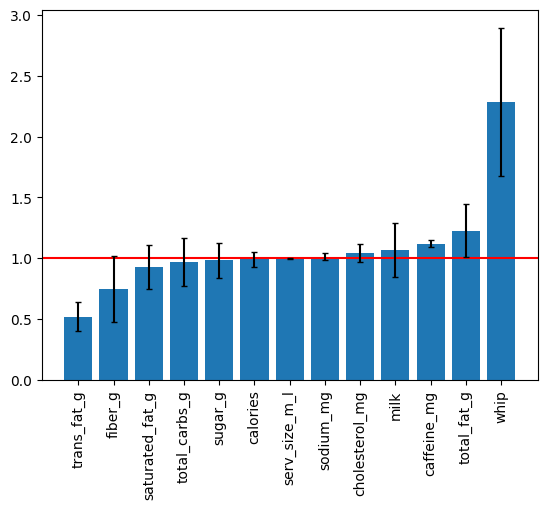

frappuccino


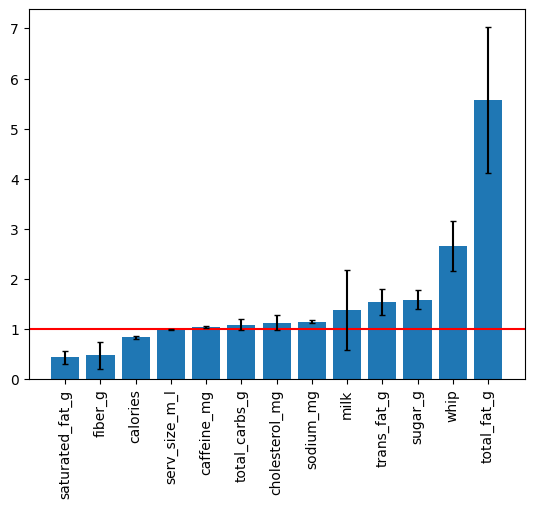

other


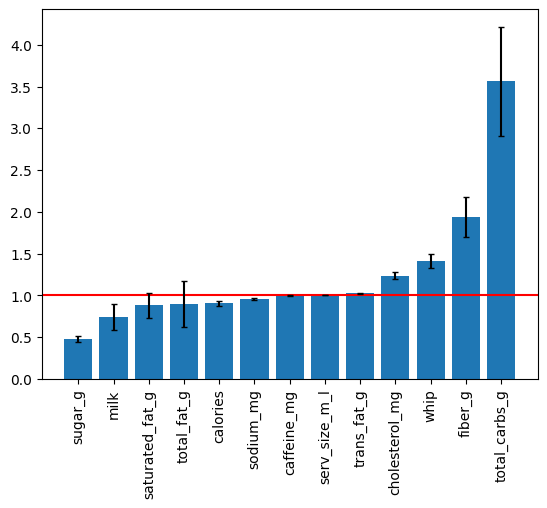

tea


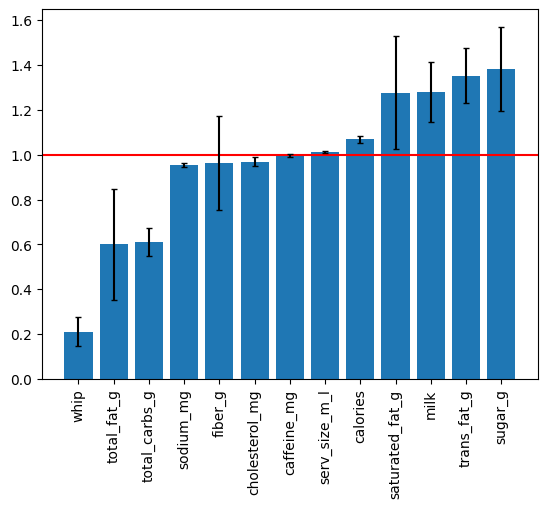

In [14]:
for cat in range(0,len(catnames)):
    print(catnames[cat])
    feature_importance = pd.DataFrame({'Feature': colnames, 'Importance': res_average[cat], 'Std': res_std[cat]})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    bp = plt.bar(
        x = 'Feature',
        height = 'Importance',
        data = feature_importance
    )
    plt.xticks(rotation=90)
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    plt.errorbar(
        x = 'Feature', 
        y = 'Importance',
        yerr='Std', 
        data=feature_importance,
        fmt='none', c= 'black', capsize = 2)
    plt.show()

---------------------- Coffee
LR 1 :  0.9287598944591029
Index(['serv_size_m_l', 'calories', 'fiber_g', 'sugar_g', 'caffeine_mg'], dtype='object')
LR 2 :  0.9340369393139841
Index([], dtype='object')


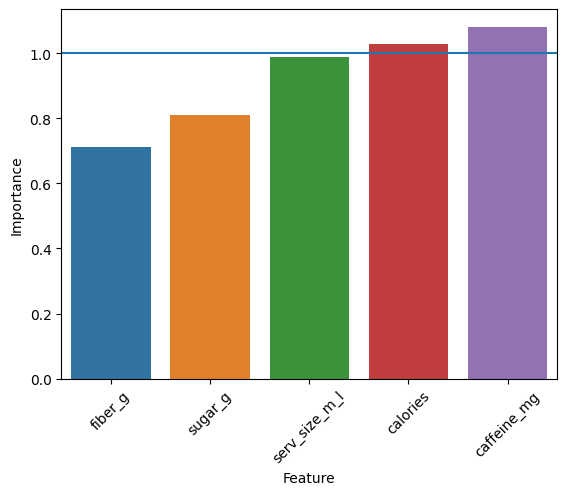

---------------------- Tea
LR 1 :  0.9102902374670184
Index(['milk', 'whip', 'serv_size_m_l', 'calories', 'total_fat_g',
       'cholesterol_mg', 'sodium_mg', 'total_carbs_g', 'fiber_g',
       'caffeine_mg'],
      dtype='object')
LR 2 :  0.9102902374670184
Index([], dtype='object')


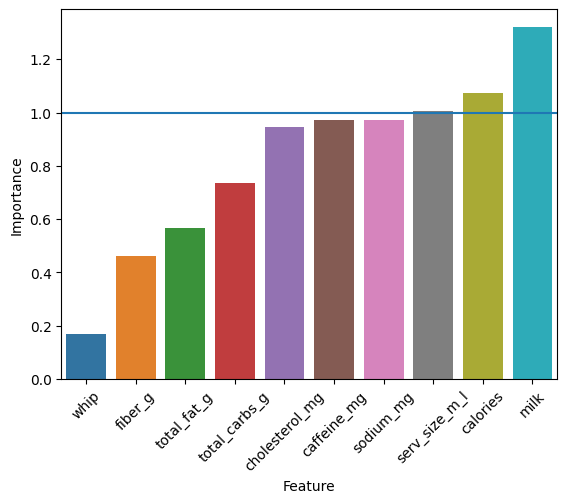

---------------------- Frappuccino
LR 1 :  0.9472295514511874
Index(['milk', 'serv_size_m_l', 'calories', 'total_fat_g', 'saturated_fat_g',
       'cholesterol_mg', 'sodium_mg', 'sugar_g', 'caffeine_mg'],
      dtype='object')
LR 2 :  0.9445910290237467
Index([], dtype='object')


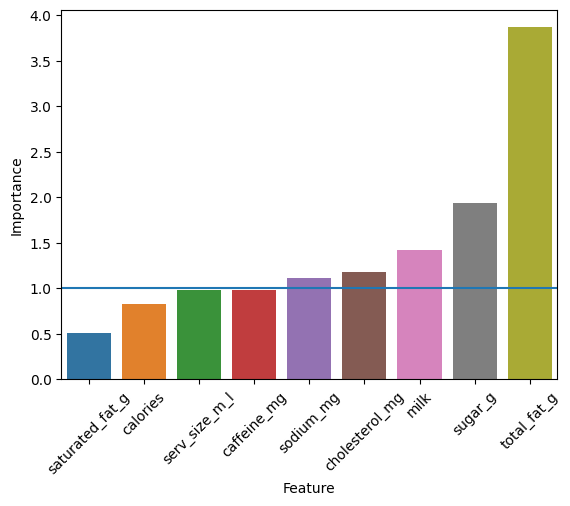

---------------------- Chocolate
LR 1 :  0.9973614775725593
Index(['serv_size_m_l', 'calories', 'cholesterol_mg', 'sodium_mg',
       'total_carbs_g', 'caffeine_mg'],
      dtype='object')
LR 2 :  0.9947229551451188
Index([], dtype='object')


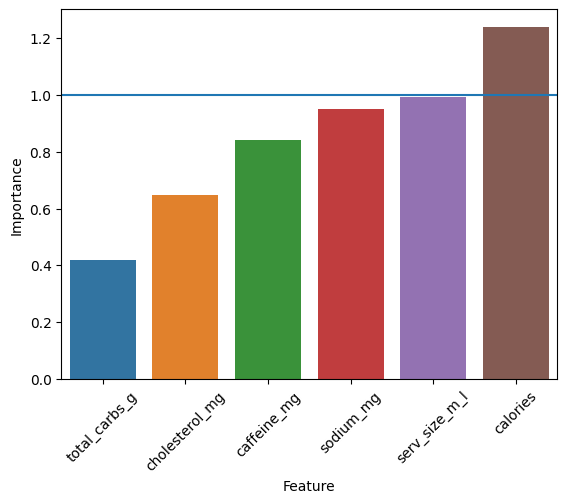

In [15]:
# Tests de Wald

Z = [(z_coffee, "Coffee"), (z_tea, "Tea"), (z_frappuccino, "Frappuccino"), (z_chocolate, "Chocolate")]

starbucksX2 = starbucksX.copy()

'''
starbucksX2 = starbucks.drop(columns=["product_name", "milk", "serv_size_m_l", "whip", "serv_size_m_l", "Category"])

starbucksX2["size"] = starbucksX2["size"].replace('solo', 0)
starbucksX2["size"] = starbucksX2["size"].replace('doppio', 0)
starbucksX2["size"] = starbucksX2["size"].replace('triple', 0)
starbucksX2["size"] = starbucksX2["size"].replace('quad', 0)
starbucksX2["size"] = starbucksX2["size"].replace('1 scoop', 0)
starbucksX2["size"] = starbucksX2["size"].replace('1 shot', 0)

starbucksX2["size"] = starbucksX2["size"].replace('short', 1)
starbucksX2["size"] = starbucksX2["size"].replace('tall', 2)
starbucksX2["size"] = starbucksX2["size"].replace('grande', 3)
starbucksX2["size"] = starbucksX2["size"].replace('venti', 4)
starbucksX2["size"] = starbucksX2["size"].replace('trenta', 5)
'''
colnames = starbucksX2.columns

'''
scaler = StandardScaler()
scaler.fit(starbucksX2)
starbucksX2 = pd.DataFrame(scaler.transform(starbucksX2), columns=colnames)
'''

import scipy.stats as spst

def Waldtest_LR(model, X):
    prob = model.predict_proba(X)
    What = np.diag(np.product(prob, axis=1))
    In_F = X.T @ What @ X
    shat = np.sqrt(np.diag(np.linalg.inv(In_F)))
    zscores = model.coef_ / shat
    nonsign = np.abs(zscores) <= spst.norm.ppf(1 - 0.05 / 2, loc=0, scale=1)
    return zscores, nonsign

def feature_importance(cls, class_label, colnames):
    class_index = np.where(cls.classes_ == class_label)[0][0]

    feature_importance = pd.DataFrame({'Feature': colnames, 'Importance': np.exp(cls.coef_[class_index])})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    bp = sns.barplot(
        x = 'Feature',
        y = 'Importance',
        data = feature_importance
    )
    plt.xticks(rotation=45)
    bp.axhline(1)
    plt.show()

for z in Z :

    print("----------------------",z[1])
    
    X_train, X_test, z_train, z_test = train_test_split(starbucksX2, z[0], test_size=0.33, random_state=23)
    LR.fit(X_train, z_train)
    z_pred_lr = LR.predict(X_test)
    print("LR 1 : ", accuracy_score(z_pred_lr, z_test))

    new_X = starbucksX2.drop(columns=starbucksX2.columns[Waldtest_LR(LR, starbucksX2)[1][0]])
    print(new_X.columns)

    X_train, X_test, z_train, z_test = train_test_split(new_X, z[0], test_size=0.33, random_state=23)
    LR.fit(X_train, z_train)
    z_pred_lr = LR.predict(X_test)
    print("LR 2 : ", accuracy_score(z_pred_lr, z_test))
    
    print(new_X.columns[Waldtest_LR(LR, new_X)[1][0]])
    
    feature_importance(LR, 0, new_X.columns)

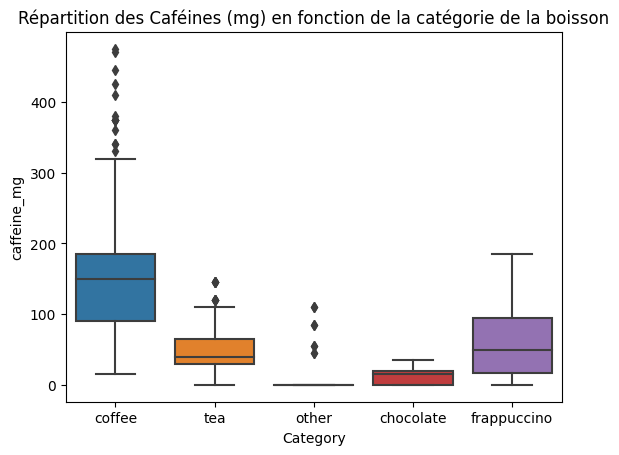

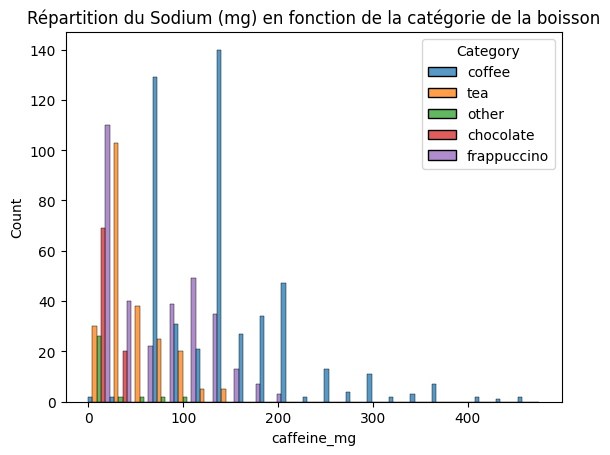

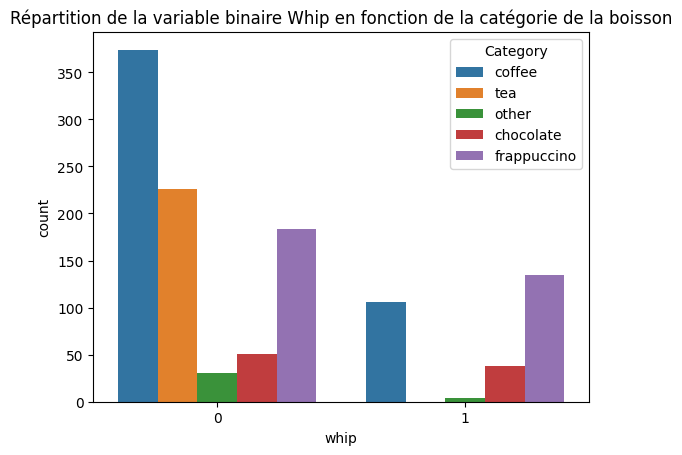

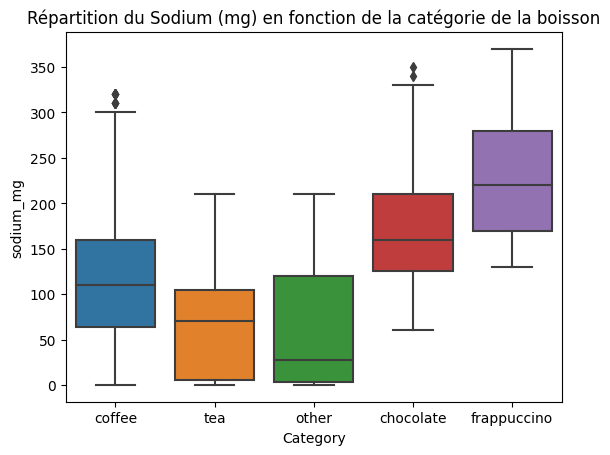

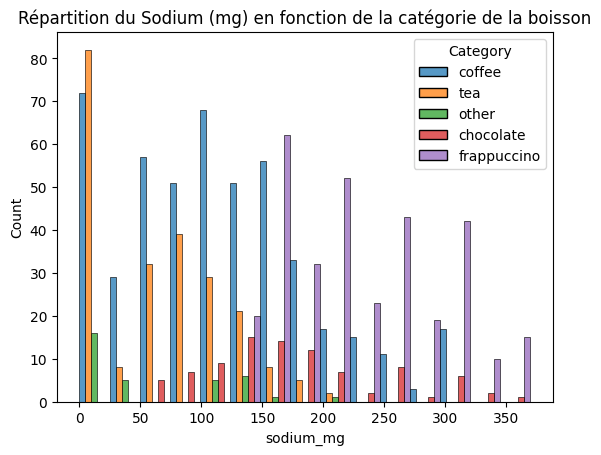

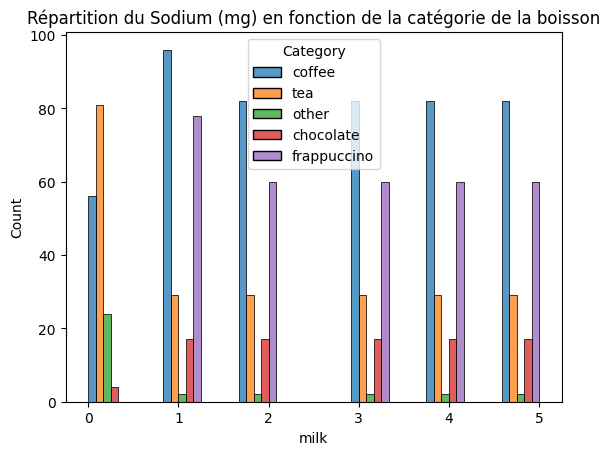

In [16]:
sns.boxplot(
    x="Category",
    y="caffeine_mg",
    data=starbucks
    ).set(title='Répartition des Caféines (mg) en fonction de la catégorie de la boisson')
plt.show()

sns.histplot(
    x="caffeine_mg",
    hue="Category",
    data=starbucks,
    multiple="dodge"
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

sns.countplot(
    x="whip",
    hue="Category",
    data=starbucks
    ).set(title='Répartition de la variable binaire Whip en fonction de la catégorie de la boisson')
plt.show()

sns.boxplot(
    x="Category",
    y="sodium_mg",
    data=starbucks
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

sns.histplot(
    x="sodium_mg",
    hue="Category",
    data=starbucks,
    multiple="dodge"
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

sns.histplot(
    x="milk",
    hue="Category",
    data=starbucks,
    multiple="dodge"
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

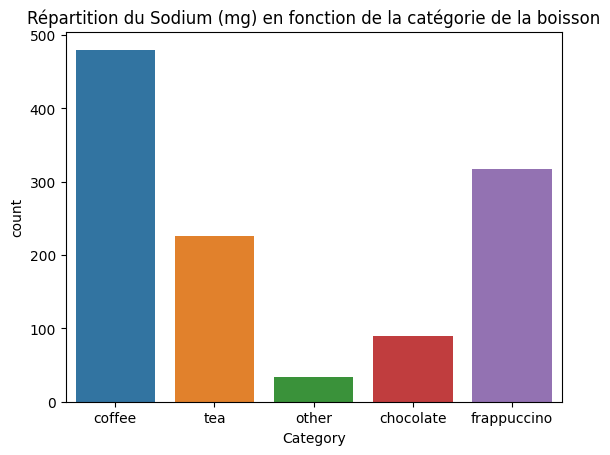

In [17]:
sns.countplot(
    x="Category",
    data=starbucks
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

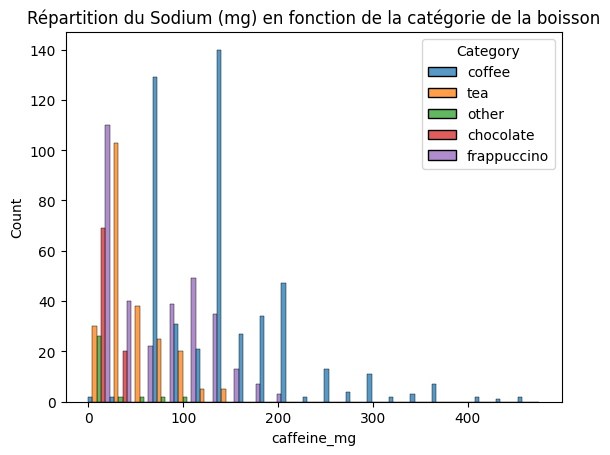

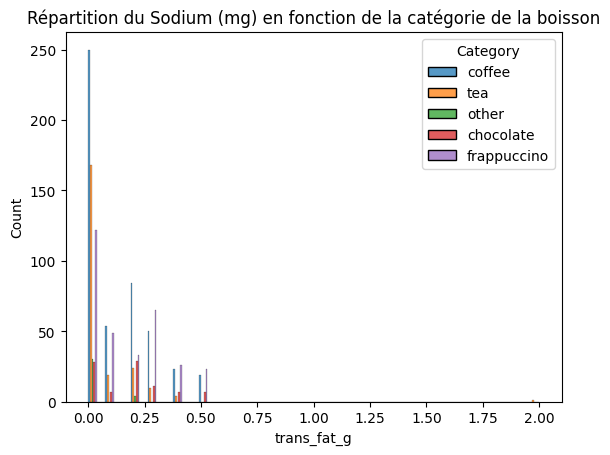

KeyError: 'size'

In [18]:
sns.histplot(
    x="caffeine_mg",
    hue="Category",
    data=starbucks,
    multiple="dodge"
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

sns.histplot(
    x="trans_fat_g",
    hue="Category",
    data=starbucks,
    multiple="dodge"
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

sns.histplot(
    x=starbucksX2["size"],
    hue=starbucks["Category"],
    multiple="dodge"
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

sns.histplot(
    x="cholesterol_mg",
    hue="Category",
    data=starbucks,
    multiple="dodge"
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

In [ ]:
sns.histplot(
    x="calories",
    hue="Category",
    data=starbucks,
    multiple="dodge"
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

sns.histplot(
    x="total_fat_g",
    hue="Category",
    data=starbucks,
    multiple="dodge"
    ).set(title='Répartition du Sodium (mg) en fonction de la catégorie de la boisson')
plt.show()

In [ ]:
# Comparaison des feature importance par test de permutation

from sklearn.inspection import permutation_importance

Z = [(z_coffee, "Coffee"), (z_tea, "Tea"), (z_frappuccino, "Frappuccino"), (z_chocolate, "Chocolate")]

for z in Z :
    print("---------------", z[1])
    
    X_train, X_test, z_train, z_test = train_test_split(starbucksX2, z[0], test_size=0.33, random_state=23)
    colnames = starbucksX2.columns

    LR.fit(X_train, z_train)

    z_pred_lr = LR.predict(X_test)

    print("Ensemble de test : ", len(z_test), " avec ", sum(z_test), " ", z[1])
    print("LR : ", accuracy_score(z_pred_lr, z_test))
    
    perm_importance_result_train_lr = permutation_importance(
        LR, X_train, z_train, n_repeats=10
    )
    
    lr_mean = perm_importance_result_train_lr["importances_mean"]
    lr_std = perm_importance_result_train_lr["importances_std"]
    
    feature_importance_mean = {
        "feature" : colnames,
        "lr" : lr_mean
    }
    
    feature_importance_mean = pd.DataFrame(feature_importance_mean).melt("feature")
    feature_importance_mean = feature_importance_mean.rename(columns={"value": "mean"})
    '''
    feature_importance_std = {
        "feature" : colnames,
        "lda" : lda_std,
        "qda" : qda_std,
        "lr" : lr_std
    }
    
    feature_importance_std = pd.DataFrame(feature_importance_std).melt("feature")
    feature_importance_std = feature_importance_std.rename(columns={"value": "std"})
    
    feature_importance = pd.concat([feature_importance_mean, feature_importance_std["std"]], axis = 1)
    '''
    feature_importance = feature_importance_mean
    #print(feature_importance)
    
    bp = sns.barplot(
        x="feature",
        y="mean",
        hue="variable",
        data=feature_importance
    )
    bp.set(xlabel="", ylabel="Accuracy moyenne (10 répétitions)")
    plt.xticks(rotation=45)
    plt.show()

In [19]:
starbucksX2 = starbucksX.copy()
colnames = starbucksX2.columns

#scaler = StandardScaler()
#scaler.fit(starbucksX2)
#starbucksX2 = pd.DataFrame(scaler.transform(starbucksX2), columns=colnames)


res = []
print("---------------------- coffee")
for i in range(0,100) :
    #print("---------------------- coffee")

    X_train, X_test, z_train, z_test = train_test_split(starbucksX2, z_coffee, test_size=0.33, random_state=i)
    LR.fit(X_train, z_train)
    z_pred_lr = LR.predict(X_test)
    #print("LR 1 : ", accuracy_score(z_pred_lr, z_test))

    res = res + list(starbucksX2.columns[Waldtest_LR(LR, starbucksX2)[1][0]])

#print(res)
print(pd.DataFrame(res)[0].value_counts())

---------------------- coffee
trans_fat_g        100
cholesterol_mg     100
whip                99
total_carbs_g       94
fiber_g             90
sodium_mg           89
milk                67
total_fat_g         35
sugar_g             26
saturated_fat_g     20
Name: 0, dtype: int64


In [20]:
starbucksX2 = starbucksX.copy()
colnames = starbucksX2.columns

scaler = StandardScaler()
scaler.fit(starbucksX2)
starbucksX2 = pd.DataFrame(scaler.transform(starbucksX2), columns=colnames)

for z in Z :
    res = []
    print("---------------------- ", z[1])
    for i in range(0,100) :

        #print("---------------------- coffee")

        X_train, X_test, z_train, z_test = train_test_split(starbucksX2, z[0], test_size=0.33, random_state=i)
        LR.fit(X_train, z_train)
        z_pred_lr = LR.predict(X_test)
        #print("LR 1 : ", accuracy_score(z_pred_lr, z_test))

        res = res + list(starbucksX2.columns[Waldtest_LR(LR, starbucksX2)[1][0]])

    #print(res)
    print(pd.DataFrame(res)[0].value_counts())

----------------------  Coffee
whip               100
calories           100
total_fat_g        100
saturated_fat_g    100
total_carbs_g      100
fiber_g            100
sugar_g            100
sodium_mg           99
milk                90
cholesterol_mg      59
trans_fat_g          2
Name: 0, dtype: int64
----------------------  Tea
calories           100
total_fat_g        100
saturated_fat_g    100
trans_fat_g        100
cholesterol_mg     100
total_carbs_g      100
sugar_g            100
milk                55
fiber_g              1
Name: 0, dtype: int64
----------------------  Frappuccino
total_fat_g        100
cholesterol_mg     100
total_carbs_g      100
fiber_g            100
sugar_g            100
trans_fat_g         63
saturated_fat_g     25
Name: 0, dtype: int64
----------------------  Chocolate
calories           100
total_fat_g        100
cholesterol_mg     100
total_carbs_g      100
sugar_g            100
trans_fat_g         99
saturated_fat_g     94
sodium_mg           92
